In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.keras import backend as K
config = tf.compat.v1.ConfigProto()
# A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.allocator_type = 'BFC' 
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
set_session(tf.compat.v1.Session(config=config))

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
# 分类 [0, 1, 2, ... ,9]
num_classes = 10
# 输入形状
input_shape = (28, 28, 1)

# 获取数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 数据集中每个像素值为[0, 255]，现在将其范围转变成 [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# 检查输入
print(f"x_train 形状: {x_train.shape}")
print(f"{x_train.shape[0]} 个训练样本")
print(f"{x_test.shape[0]} 个测试样本")


# 将输出 one hot 化 （0，1，0，0）
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train 形状: (60000, 28, 28, 1)
60000 个训练样本
10000 个测试样本


In [5]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
"""
tf.keras.layers.Conv2D(
    filters, # 整数，输出空间的维数（即卷积中输出过滤器的数量）
    kernel_size, # 1个整数或含2个整数的元组/列表，指定2D卷积窗口的高度和宽度。
                   可以是单个整数，为所有空间尺寸指定相同的值。
    strides=(1, 1), # 含两个整数的元组/列表，指定沿高度和宽度的卷积的步幅。
                      可以是单个整数，以为所有空间尺寸指定相同的值。
    padding="valid", # "valid"或"same"（不区分大小写）之一。 "valid"表示没有填充。
                       "same"导致在输入的左/右或上/下均匀填充，以使输出具有与输入相同的高度/宽度尺寸。
    data_format=None,
    dilation_rate=(1, 1), # 一个整数或2个整数的元组/列表，指定用于扩张卷积的扩张率。
                            可以是单个整数，以为所有空间尺寸指定相同的值。
    groups=1,
    activation=None, # 要使用的激活函数。
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), # 1个整数或含2个整数的元组，最大的窗口大小。(2, 2)将在2x2的合并窗口中采用最大值。
                        如果仅指定一个整数，则两个尺寸将使用相同的窗口长度。
    strides=None, # 整数或2个整数的元组。指定每个池化步骤的池化窗口移动的距离。
                    如果为None，则默认为pool_size
    padding="valid", # "valid"或"same"之一。 "valid"表示没有填充。"same"在输入的左/右或上/下均匀填充，
                        以使输出具有与输入相同的高度/宽度尺寸
    data_format=None, 
    **kwargs
)
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(120, activation="tanh"),
        layers.Dense(84, activation="tanh"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

In [8]:
batch_size = 1024
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
47/47 [==============================] - 1s 24ms/step - loss: 0.7652 - accuracy: 0.7871 - val_loss: 0.1569 - val_accuracy: 0.9564
Epoch 2/20
47/47 [==============================] - 1s 14ms/step - loss: 0.1537 - accuracy: 0.9550 - val_loss: 0.0835 - val_accuracy: 0.9761
Epoch 3/20
47/47 [==============================] - 1s 15ms/step - loss: 0.1006 - accuracy: 0.9701 - val_loss: 0.0627 - val_accuracy: 0.9819
Epoch 4/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0785 - accuracy: 0.9764 - val_loss: 0.0512 - val_accuracy: 0.9851
Epoch 5/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0641 - accuracy: 0.9808 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 6/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0553 - accuracy: 0.9833 - val_loss: 0.0398 - val_accuracy: 0.9880
Epoch 7/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0482 - accuracy: 0.9853 - val_loss: 0.0369 - val_accuracy: 0.9890
Epoch 8/20
47

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("测试集 loss:", score[0])
print("测试集准确度", score[1])

测试集 loss: 0.019948739558458328
测试集准确度 0.9932000041007996


# 查看输出

In [10]:
y_pred = model.predict(x_test, batch_size=1024)

In [11]:
def display_img(idx):
    pixels = x_test[idx].reshape([28,28])
    plt.gray()
    plt.imshow(pixels)
    ans = np.argmax(y_test[idx])
    pred = np.argmax(y_pred[idx])
    print(f"答案：{ans}")
    print(f"预测：{pred}")

答案：1
预测：1


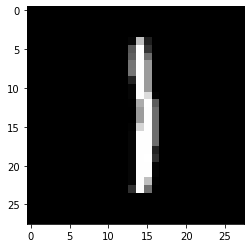

In [12]:
display_img(154)